In [1]:
from typing import Optional
import os
import sys
import numpy as np

from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector

from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import RXGate, IGate

from qiskit_experiments.library.tomography.basis import PauliPreparationBasis
from qiskit.quantum_info import Operator, average_gate_fidelity
from itertools import product
    
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)

from helper_functions import load_from_pickle

/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
optimized_params = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/template_configurations/qiskit/gate_level/noisy_circuit/optimization_results_NM_CMAES.pickle')

In [3]:
input_circuits = [
    PauliPreparationBasis().circuit(s)
    for s in product(range(4), repeat=2)
]

def get_final_state(input_qc, params, phi, mode: Optional[str], gamma: Optional[float]):
    # qc = QuantumCircuit(2)
    qc = input_qc.copy()
    qc.rx(phi, 0)
    if mode == 'noisy':
        qc.rx(gamma * phi, 1)
    qc.u(params[0], params[1], params[2], 0)
    qc.u(params[3], params[4], params[5], 1)
    qc.rzx(params[6], 0, 1)

    return Operator(qc)

optimal_noise_free_actions = np.pi * np.array([0.0, 0.0, 0.5, 0.5, -0.5, 0.5, -0.5])
avg_gate_fids = {}
for phi, gamma in optimized_params.keys():
    params = optimized_params[(phi, gamma)]['cma_es']['optimized_params']
    for input_qc in input_circuits:
        ideal_circ_op = get_final_state(input_qc, optimal_noise_free_actions, phi, 'ideal', gamma)
        noisy_circ_op = get_final_state(input_qc, params, phi, 'noisy', gamma)
        avg_gate_fids[(gamma, phi)] = average_gate_fidelity(ideal_circ_op, noisy_circ_op)
        print('Final Circuit Fidelity:', avg_gate_fids[(gamma, phi)])

Final Circuit Fidelity: 0.9999999999999956
Final Circuit Fidelity: 0.9999999999999956
Final Circuit Fidelity: 0.999999999999995
Final Circuit Fidelity: 0.999999999999995
Final Circuit Fidelity: 0.9999999999999956
Final Circuit Fidelity: 0.9999999999999956
Final Circuit Fidelity: 0.999999999999995
Final Circuit Fidelity: 0.999999999999995
Final Circuit Fidelity: 0.9999999999999952
Final Circuit Fidelity: 0.9999999999999952
Final Circuit Fidelity: 0.999999999999995
Final Circuit Fidelity: 0.9999999999999947
Final Circuit Fidelity: 0.999999999999995
Final Circuit Fidelity: 0.999999999999995
Final Circuit Fidelity: 0.9999999999999947
Final Circuit Fidelity: 0.9999999999999949
Final Circuit Fidelity: 0.9999999999999837
Final Circuit Fidelity: 0.9999999999999837
Final Circuit Fidelity: 0.9999999999999831
Final Circuit Fidelity: 0.9999999999999829
Final Circuit Fidelity: 0.9999999999999837
Final Circuit Fidelity: 0.9999999999999837
Final Circuit Fidelity: 0.9999999999999831
Final Circuit Fide

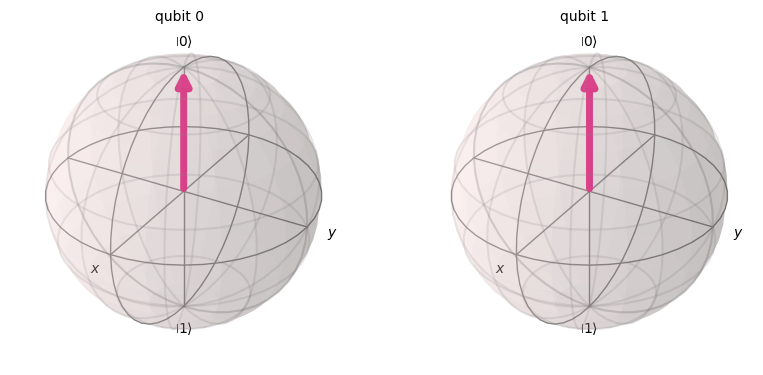

In [4]:
phi = np.pi
gamma = 0.15

optimization_result = optimized_params[(phi, gamma)]

optimal_noise_free_actions = np.pi * np.array([0.0, 0.0, 0.5, 0.5, -0.5, 0.5, -0.5])

# Define your quantum state as a Statevector
state = Statevector.from_label('00')  # For example, a simple 2-qubit state |00>
plot_bloch_multivector(state)

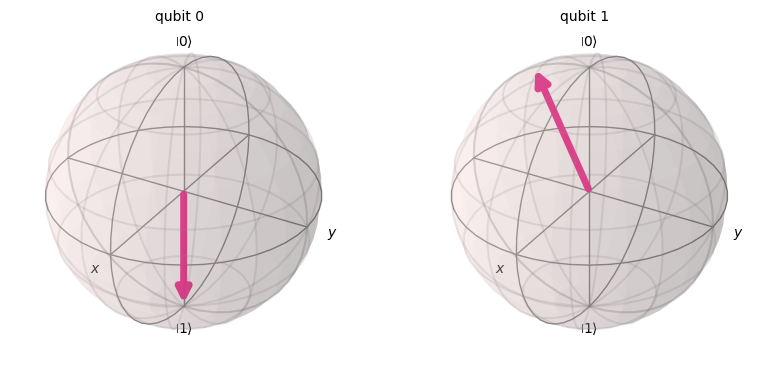

In [5]:
state = state.evolve(Operator(RXGate(phi)).expand(IGate())) # Apply a rotation around the x-axis
state = state.evolve(Operator(IGate()).expand(RXGate(gamma * phi))) # Noise
plot_bloch_multivector(state)

In [6]:
params = optimization_result['cma_es']['optimized_params']

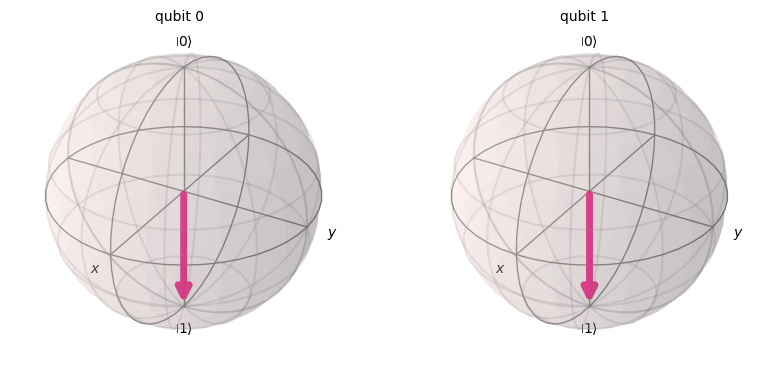

In [7]:
cx_circ = QuantumCircuit(2)
cx_circ.u(params[0], params[1], params[2], 0)
cx_circ.u(params[3], params[4], params[5], 1)
cx_circ.rzx(params[6], 0, 1)

state = state.evolve(Operator(cx_circ))
plot_bloch_multivector(state)